### External Imports

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install stable-baselines[mpi] > /dev/null 2>&1
!pip install tensorflow==1.15 > /dev/null 2>&1

In [3]:
!rm -rf hc-environment/
! git clone https://gitlab.gwdg.de/kimsarah.meier/hc-environment.git > /dev/null 2>&1
! cd hc-environment
! pip install -e hc-environment > /dev/null 2>&1
exit()

### Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import gym
import seaborn as sns
import matplotlib.pyplot as plt

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import PPO2
from stable_baselines.bench.monitor import Monitor
from stable_baselines.common.callbacks import EvalCallback
from gym_honeycomb.common import DummySimulation, SimpleSimulation, plot_training_results
from stable_baselines.common.vec_env import DummyVecEnv, VecNormalize
from gym_honeycomb.common import emp_utils, sim_utils, plots_utils

import numpy.random
numpy.random.seed(2021)

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', None)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



# Check performance Majority

In [ ]:
seeds_maj = [518, 
             321, 
             7373, 
             601, 
             3639, 
             4444, 
             307, 
             12]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


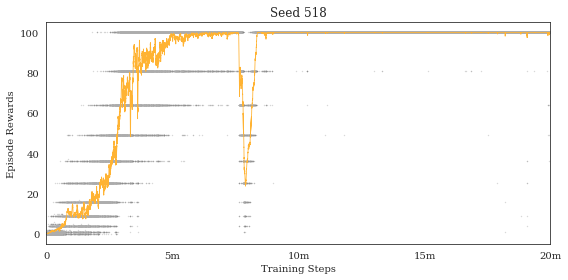

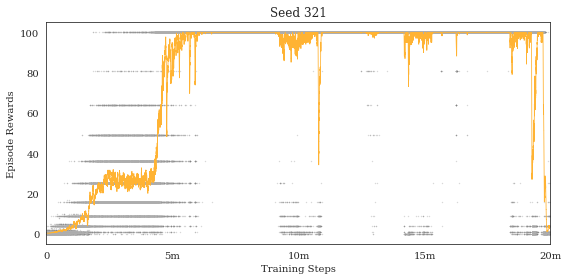

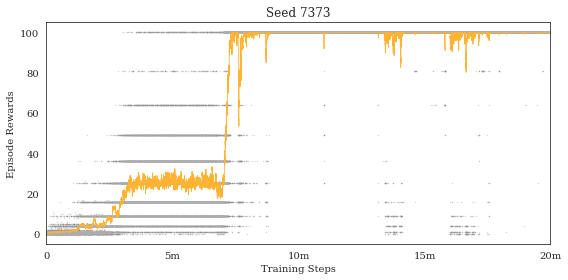

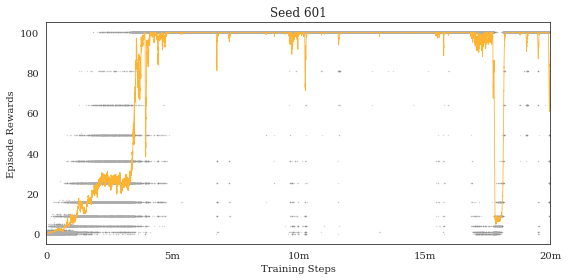

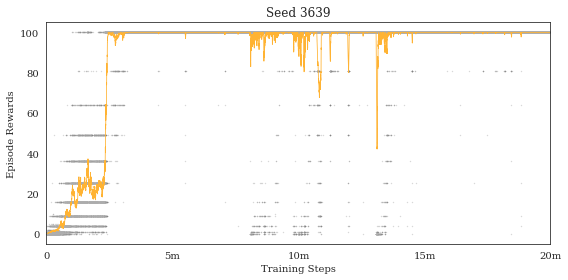

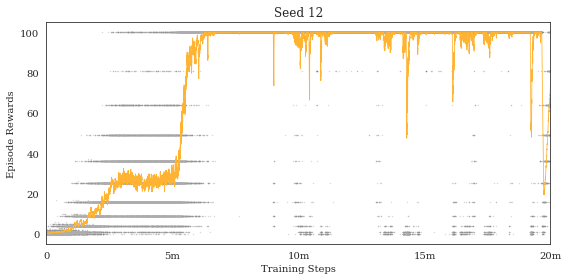

In [ ]:
for s in seeds_maj: 
  mon_log_dir = '/content/drive/MyDrive/HC/SB_FINAL3/Maj/maj_step6000_oep5_mb200_' + str(s) + '/monitor'
  plot_training_results([mon_log_dir], 1e11, xaxis='timesteps', task_name='Seed ' + str(s),
                        save_path='/content/drive/MyDrive/HC/TrainingPlots/'+ str(s) + '.png')
  print('\n')

# Check performance Minority

In [ ]:
seeds_min = [23456, 342]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


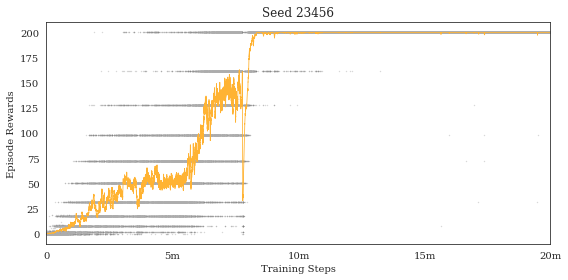

In [ ]:
for s in seeds_min: 
  mon_log_dir = '/content/drive/MyDrive/HC/SB_FINAL3/Min/min_step6000_oep5_mb200_' + str(s) + '/monitor'
  plot_training_results([mon_log_dir], 1e11, xaxis='timesteps', task_name='Seed ' + str(s),
                        save_path='/content/drive/MyDrive/HC/TrainingPlots/'+ str(s) + '.png')
  print('\n')

# Check Performance

KL

In [2]:
data_12 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/KL values/Kl12')
data_12['seed'] = [12] * data_12.shape[0]

data_307 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/KL values/Kl307')
data_307['seed'] = [307] * data_307.shape[0]

data_321 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/KL values/Kl321')
data_321['seed'] = [321] * data_321.shape[0]

data_3639 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/KL values/Kl3639')
data_3639['seed'] = [3639] * data_3639.shape[0]

data_4444 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/KL values/Kl4444')
data_4444['seed'] = [4444] * data_4444.shape[0]

data_518 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/KL values/Kl518')
data_518['seed'] = [518] * data_518.shape[0]

data_601 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/KL values/Kl601')
data_601['seed'] = [601] * data_601.shape[0]

data_7373 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/KL values/Kl7373')
data_7373['seed'] = [7373] * data_7373.shape[0]

data_23456 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/KL values/Kl23456')
data_23456['seed'] = [23456] * data_23456.shape[0]
data_342 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/KL values/Kl342')
data_342['seed'] = [342] * data_342.shape[0]

data = data_12
data = data.append([data_307, data_321, data_3639, data_4444, data_518, data_601, data_7373, data_23456, data_342] ,ignore_index=True)

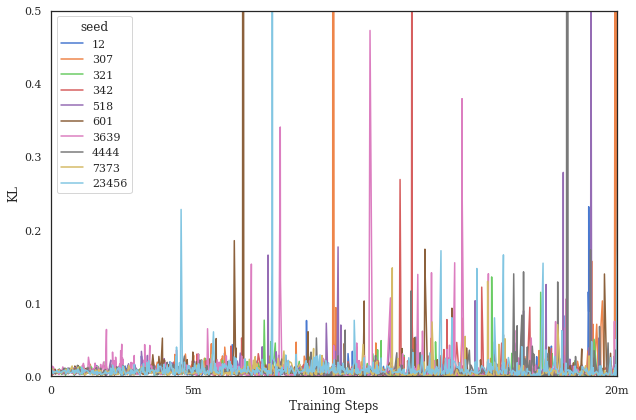

In [3]:
sns.set_theme(style="white")
sns.set_style({'font.family': 'serif', 'font.serif': 'Times New Roman'})
fig, ax = plt.subplots(1,1, figsize = (9, 6))
sns.lineplot(data=data, x='Step', y='Value', hue='seed', palette='muted')
plt.xlim(0, 20e6)
plt.ylim(0, 0.5)
plt.xticks([0, 5e6, 10e6, 15e6, 20e6])
ax.set_xticklabels(['0', '5m', '10m', '15m', '20m'])
plt.ylabel('KL')
plt.xlabel('Training Steps')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/HC/TrainingPlots/KL.png')

Entropy

In [ ]:
data_12 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/Entropy Loss/E12')
data_12['seed'] = [12] * data_12.shape[0]

data_307 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/Entropy Loss/E307')
data_307['seed'] = [307] * data_307.shape[0]

data_321 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/Entropy Loss/E321')
data_321['seed'] = [321] * data_321.shape[0]

data_3639 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/Entropy Loss/E3639')
data_3639['seed'] = [3639] * data_3639.shape[0]

data_4444 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/Entropy Loss/E4444')
data_4444['seed'] = [4444] * data_4444.shape[0]

data_518 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/Entropy Loss/E518')
data_518['seed'] = [518] * data_518.shape[0]

data_601 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/Entropy Loss/E601')
data_601['seed'] = [601] * data_601.shape[0]

data_7373 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/Entropy Loss/E7373')
data_7373['seed'] = [7373] * data_7373.shape[0]

data_23456 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/Entropy Loss/E23456')
data_23456['seed'] = [23456] * data_23456.shape[0]
data_342 = pd.read_csv('/content/drive/MyDrive/HC/TrainingPlots/Data/Entropy Loss/E342')
data_342['seed'] = [342] * data_342.shape[0]

data = data_12
data = data.append([data_307, data_321, data_3639, data_4444, data_518, data_601, data_7373, data_23456, data_342] ,ignore_index=True)

In [ ]:
sns.set_theme(style="white")
sns.set_style({'font.family': 'serif', 'font.serif': 'Times New Roman'})
fig, ax = plt.subplots(1,1, figsize = (12, 6))
sns.lineplot(data=data, x='Step', y='Value', hue='seed', palette='muted')
plt.xlim(0, 20e6)
plt.xticks([0, 5e6, 10e6, 15e6, 20e6])
ax.set_xticklabels(['0', '5m', '10m', '15m', '20m'])
plt.ylabel('Entropy Loss')
plt.xlabel('Training Steps')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/HC/TrainingPlots/Entropy.png')

# List policy direcories:

In [ ]:
policy_dir_list = []

policy_seeds_maj = [518, 321, 7373, 601, 3639, 307, 4444, 12]
policy_seeds_min = [23456, 342]
for s in policy_seeds_maj:
  policy_dir_list.append('/content/drive/MyDrive/HC/SB_FINAL3/Maj/maj_step6000_oep5_mb200_' + str(s) + '/best_model_st13600000.zip')

for s in policy_seeds_min:
   policy_dir_list.append('/content/drive/MyDrive/HC/SB_FINAL3/Min/min_step6000_oep5_mb200_' + str(s) + '/best_model_st13600000.zip')

sim_nr = 5000
print('Use policies with seeds:', policy_seeds_maj + policy_seeds_min)

Use policies with seeds: [518, 321, 7373, 601, 3639, 307, 4444, 12, 23456, 342]


# Test Policy 518:

In [ ]:
print('Policy:', policy_dir_list[0])

Policy: /content/drive/MyDrive/HC/SB_FINAL3/Maj/maj_step6000_oep5_mb200_518/best_model_st13600000.zip


### Simulation

In [ ]:
sim1 = SimpleSimulation()
df_move1, df_eval1, df_check1 = sim1.one_agent_simulation(agent0=policy_dir_list[0],
                                                      num_sim=sim_nr, num_step=600,
                                                      deterministic=False)


 ------------ Start Simulation ------------
Load agent...





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




 ------ Start 5000 Simulations ------
0 Games over! Average Reward= 50.0
100 Games over! Average Reward= 50.0
200 Games over! Average Reward= 50.0
300 Games over! Average Reward= 50.0
400 Games over! Average Reward= 50.0
500 Games over! Average Reward= 50.0
600 Games over! Average Reward= 50.0
700 Games over! Average Reward= 50.0
800 Games over! Average Reward= 50.0
900 Games over! Average Reward= 50.0
1000 Games over! Average Reward= 50.0
1100 Games over! Average Reward= 50.0
1200 Games over! Average Reward= 50.0
1300 Games over! Average Reward= 50.0
1400 Games over! Average Reward= 50.0
1500 Games over! Average Reward= 50.0
1600 Games over! Average Reward= 50.0
1700 Games over! Average Rewa

## Check Dataframes

### Check df

In [ ]:
sim1.check_end_position

sim  agent      0      1      2      3  ...  18  19  20  21  22  23
end_position                                            ...                        
(0, 3)        50000  50000  50000  50000  50000  50000  ...  30  30  30  30  10  10

[1 rows x 26 columns]

In [ ]:
sim1.df_check

sim  agent       0       1       2  ...   19   20   21   22   23
0         0      0  (6, 6)  (5, 5)  (4, 5)  ...  NaN  NaN  NaN  NaN  NaN
1         0      1  (6, 6)  (5, 5)  (4, 4)  ...  NaN  NaN  NaN  NaN  NaN
2         0      2  (6, 6)  (5, 5)  (4, 4)  ...  NaN  NaN  NaN  NaN  NaN
3         0      3  (6, 6)  (5, 6)  (4, 6)  ...  NaN  NaN  NaN  NaN  NaN
4         0      4  (6, 6)  (5, 5)  (4, 5)  ...  NaN  NaN  NaN  NaN  NaN
...     ...    ...     ...     ...     ...  ...  ...  ...  ...  ...  ...
49995  4999      5  (6, 6)  (5, 5)  (4, 4)  ...  NaN  NaN  NaN  NaN  NaN
49996  4999      6  (6, 6)  (5, 5)  (4, 4)  ...  NaN  NaN  NaN  NaN  NaN
49997  4999      7  (6, 6)  (6, 7)  (5, 7)  ...  NaN  NaN  NaN  NaN  NaN
49998  4999      8  (6, 6)  (5, 6)  (4, 5)  ...  NaN  NaN  NaN  NaN  NaN
49999  4999      9  (6, 6)  (5, 6)  (4, 5)  ...  NaN  NaN  NaN  NaN  NaN

[50000 rows x 27 columns]

### Eval df

In [ ]:
sim1.eval_summary

sim           id      informed  ...  arrived  arrivals         moves
count  50000.000000  50000.00000  50000.000000  ...  50000.0   50000.0  50000.000000
mean    2499.500000      4.50000      0.200000  ...      0.0       0.0     11.706000
std     1443.390078      2.87231      0.400004  ...      0.0       0.0      0.464509
min        0.000000      0.00000      0.000000  ...      0.0       0.0      6.000000
25%     1249.750000      2.00000      0.000000  ...      0.0       0.0     11.000000
50%     2499.500000      4.50000      0.000000  ...      0.0       0.0     12.000000
75%     3749.250000      7.00000      0.000000  ...      0.0       0.0     12.000000
max     4999.000000      9.00000      1.000000  ...      0.0       0.0     13.000000

[8 rows x 8 columns]

In [ ]:
sim1.df_eval

sim  id  informed  reward  remaining moves  arrived  arrivals  moves
0         0   0         0     5.0                3        0         0     12
1         0   1         0     5.0                3        0         0     12
2         0   2         0     5.0                3        0         0     12
3         0   3         0     5.0                4        0         0     11
4         0   4         0     5.0                4        0         0     11
...     ...  ..       ...     ...              ...      ...       ...    ...
49995  4999   5         0     5.0                4        0         0     11
49996  4999   6         0     5.0                4        0         0     11
49997  4999   7         0     5.0                3        0         0     12
49998  4999   8         1     5.0                3        0         0     12
49999  4999   9         1     5.0                4        0         0     11

[50000 rows x 8 columns]

### Move df

In [ ]:
sim1.df_move.describe()

sim           turn  ...             s1             s2
count  585300.000000  585300.000000  ...  585300.000000  585300.000000
mean     2499.994138      59.189833  ...       1.928802       4.021052
std      1443.251160      34.011382  ...       1.516170       1.132270
min         0.000000       1.000000  ...       0.000000       1.000000
25%      1250.000000      30.000000  ...       1.000000       3.000000
50%      2500.000000      59.000000  ...       1.000000       4.000000
75%      3750.000000      88.000000  ...       3.000000       5.000000
max      4999.000000     222.000000  ...       8.000000      10.000000

[8 rows x 6 columns]

## Plot

In [ ]:
sim1.save_results(path='/content')
# ANPASSEN
moves_path = '/content/sim_train_move.csv'
eval_path = '/content/sim_train_eval.csv'

output_path = '/content/drive/MyDrive/HC/VergleicheIndSim'
colors, map = sim_utils.get_sim_freq(path_movescsv=moves_path)
plots_utils.make_freq_plot(rgba_colors=colors, mapmap = map, plotname = 'sim_freqplot_518', minority=False, output_path=output_path)

Saved dataframes in folder: /content


# Test Policy 321:

In [ ]:
print('Policy:', policy_dir_list[1])

Policy: /content/drive/MyDrive/HC/SB_FINAL3/Maj/maj_step6000_oep5_mb200_321/best_model_st13600000.zip


## Simulation

In [ ]:
sim2 = SimpleSimulation()
df_move2, df_eval2, df_check2 = sim2.one_agent_simulation(agent0=policy_dir_list[1],
                                                      num_sim=sim_nr, num_step=600,
                                                      deterministic=False)


 ------------ Start Simulation ------------
Load agent...

 ------ Start 5000 Simulations ------
0 Games over! Average Reward= 50.0
100 Games over! Average Reward= 50.0
200 Games over! Average Reward= 50.0
300 Games over! Average Reward= 50.0
400 Games over! Average Reward= 50.0
500 Games over! Average Reward= 50.0
600 Games over! Average Reward= 50.0
700 Games over! Average Reward= 50.0
800 Games over! Average Reward= 50.0
900 Games over! Average Reward= 50.0
1000 Games over! Average Reward= 50.0
1100 Games over! Average Reward= 50.0
1200 Games over! Average Reward= 50.0
1300 Games over! Average Reward= 50.0
1400 Games over! Average Reward= 50.0
1500 Games over! Average Reward= 50.0
1600 Games over! Average Reward= 50.0
1700 Games over! Average Reward= 50.0
1800 Games over! Average Reward= 50.0
1900 Games over! Average Reward= 50.0
2000 Games over! Average Reward= 50.0
2100 Games over! Average Reward= 50.0
2200 Games over! Average Reward= 50.0
2300 Games over! Average Reward= 50.0
24

## Check dataframes

### Check df

In [ ]:
sim2.check_end_position

sim  agent      0      1      2      3  ...  16  17  18  19  20  21
end_position                                            ...                        
(3, 0)        50000  50000  50000  50000  50000  50000  ...  20  10  10  10  10  10

[1 rows x 24 columns]

In [ ]:
sim2.df_check

sim  agent       0       1       2  ...   17   18   19   20   21
0         0      0  (6, 6)  (5, 5)  (4, 4)  ...  NaN  NaN  NaN  NaN  NaN
1         0      1  (6, 6)  (5, 5)  (4, 4)  ...  NaN  NaN  NaN  NaN  NaN
2         0      2  (6, 6)  (5, 5)  (4, 4)  ...  NaN  NaN  NaN  NaN  NaN
3         0      3  (6, 6)  (5, 5)  (5, 4)  ...  NaN  NaN  NaN  NaN  NaN
4         0      4  (6, 6)  (5, 5)  (5, 4)  ...  NaN  NaN  NaN  NaN  NaN
...     ...    ...     ...     ...     ...  ...  ...  ...  ...  ...  ...
49995  4999      5  (6, 6)  (6, 5)  (5, 4)  ...  NaN  NaN  NaN  NaN  NaN
49996  4999      6  (6, 6)  (5, 5)  (4, 4)  ...  NaN  NaN  NaN  NaN  NaN
49997  4999      7  (6, 6)  (5, 5)  (5, 4)  ...  NaN  NaN  NaN  NaN  NaN
49998  4999      8  (6, 6)  (6, 5)  (5, 4)  ...  NaN  NaN  NaN  NaN  NaN
49999  4999      9  (6, 6)  (5, 5)  (4, 4)  ...  NaN  NaN  NaN  NaN  NaN

[50000 rows x 25 columns]

### Eval df

In [ ]:
sim2.eval_summary

sim           id      informed  ...  arrived  arrivals         moves
count  50000.000000  50000.00000  50000.000000  ...  50000.0   50000.0  50000.000000
mean    2499.500000      4.50000      0.200000  ...      0.0       0.0      6.004220
std     1443.390078      2.87231      0.400004  ...      0.0       0.0      0.065744
min        0.000000      0.00000      0.000000  ...      0.0       0.0      6.000000
25%     1249.750000      2.00000      0.000000  ...      0.0       0.0      6.000000
50%     2499.500000      4.50000      0.000000  ...      0.0       0.0      6.000000
75%     3749.250000      7.00000      0.000000  ...      0.0       0.0      6.000000
max     4999.000000      9.00000      1.000000  ...      0.0       0.0      8.000000

[8 rows x 8 columns]

In [ ]:
sim2.df_eval

sim  id  informed  reward  remaining moves  arrived  arrivals  moves
0         0   0         0     5.0                9        0         0      6
1         0   1         0     5.0                9        0         0      6
2         0   2         0     5.0                9        0         0      6
3         0   3         0     5.0                9        0         0      6
4         0   4         0     5.0                9        0         0      6
...     ...  ..       ...     ...              ...      ...       ...    ...
49995  4999   5         0     5.0                9        0         0      6
49996  4999   6         0     5.0                9        0         0      6
49997  4999   7         0     5.0                9        0         0      6
49998  4999   8         1     5.0                9        0         0      6
49999  4999   9         1     5.0                9        0         0      6

[50000 rows x 8 columns]

### Move df

In [ ]:
sim2.df_move.describe()

sim           turn  ...             s1             s2
count  300211.000000  300211.000000  ...  300211.000000  300211.000000
mean     2499.518988      30.675002  ...       4.141364       2.499032
std      1443.314145      17.614338  ...       0.866314       1.707720
min         0.000000       1.000000  ...       2.000000       0.000000
25%      1250.000000      16.000000  ...       3.000000       1.000000
50%      2499.000000      31.000000  ...       4.000000       2.000000
75%      3749.000000      46.000000  ...       5.000000       4.000000
max      4999.000000     202.000000  ...       6.000000       7.000000

[8 rows x 6 columns]

## Plot

In [ ]:
sim2.save_results(path='/content')
# ANPASSEN
moves_path = '/content/sim_train_move.csv'
eval_path = '/content/sim_train_eval.csv'

output_path = '/content/drive/MyDrive/HC/VergleicheIndSim'
colors, map = sim_utils.get_sim_freq(path_movescsv=moves_path)
plots_utils.make_freq_plot(rgba_colors=colors, mapmap = map, plotname = 'sim_freqplot_321', minority=False, output_path=output_path)

Saved dataframes in folder: /content


# Test Policy 7373:



In [ ]:
print('Policy:', policy_dir_list[2])

Policy: /content/drive/MyDrive/HC/SB_FINAL3/Maj/maj_step6000_oep5_mb200_7373/best_model_st13600000.zip


## Simulation

In [ ]:
sim3 = SimpleSimulation()
df_move3, df_eval3, df_check3 = sim3.one_agent_simulation(agent0=policy_dir_list[2],
                                                      num_sim=sim_nr, num_step=600,
                                                      deterministic=True)


 ------------ Start Simulation ------------
Load agent...

 ------ Start 5000 Simulations ------
0 Games over! Average Reward= 50.0
100 Games over! Average Reward= 50.0
200 Games over! Average Reward= 50.0
300 Games over! Average Reward= 50.0
400 Games over! Average Reward= 50.0
500 Games over! Average Reward= 50.0
600 Games over! Average Reward= 50.0
700 Games over! Average Reward= 50.0
800 Games over! Average Reward= 50.0
900 Games over! Average Reward= 50.0
1000 Games over! Average Reward= 50.0
1100 Games over! Average Reward= 50.0
1200 Games over! Average Reward= 50.0
1300 Games over! Average Reward= 50.0
1400 Games over! Average Reward= 50.0
1500 Games over! Average Reward= 50.0
1600 Games over! Average Reward= 50.0
1700 Games over! Average Reward= 50.0
1800 Games over! Average Reward= 50.0
1900 Games over! Average Reward= 50.0
2000 Games over! Average Reward= 50.0
2100 Games over! Average Reward= 50.0
2200 Games over! Average Reward= 50.0
2300 Games over! Average Reward= 50.0
24

## Check dataframes

### Check df

In [ ]:
sim3.check_end_position

sim  agent      0      1      2      3      4      5      6
end_position                                                               
(0, 3)        50000  50000  50000  50000  50000  50000  50000  50000  50000

In [ ]:
sim3.df_check

sim  agent       0       1  ...       4       5       6 end_position
0         0      0  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
1         0      1  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
2         0      2  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
3         0      3  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
4         0      4  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
...     ...    ...     ...     ...  ...     ...     ...     ...          ...
49995  4999      5  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
49996  4999      6  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
49997  4999      7  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
49998  4999      8  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
49999  4999      9  (6, 6)  (5, 5)  ...  (2, 4)  (1, 4)  (0, 3)       (0, 3)

[50000 rows x 10 columns]

### Eval df

In [ ]:
sim3.eval_summary

sim           id      informed  ...  arrived  arrivals    moves
count  50000.000000  50000.00000  50000.000000  ...  50000.0   50000.0  50000.0
mean    2499.500000      4.50000      0.200000  ...      0.0       0.0      6.0
std     1443.390078      2.87231      0.400004  ...      0.0       0.0      0.0
min        0.000000      0.00000      0.000000  ...      0.0       0.0      6.0
25%     1249.750000      2.00000      0.000000  ...      0.0       0.0      6.0
50%     2499.500000      4.50000      0.000000  ...      0.0       0.0      6.0
75%     3749.250000      7.00000      0.000000  ...      0.0       0.0      6.0
max     4999.000000      9.00000      1.000000  ...      0.0       0.0      6.0

[8 rows x 8 columns]

In [ ]:
sim3.df_eval

sim  id  informed  reward  remaining moves  arrived  arrivals  moves
0         0   0         0     5.0                9        0         0      6
1         0   1         0     5.0                9        0         0      6
2         0   2         0     5.0                9        0         0      6
3         0   3         0     5.0                9        0         0      6
4         0   4         0     5.0                9        0         0      6
...     ...  ..       ...     ...              ...      ...       ...    ...
49995  4999   5         0     5.0                9        0         0      6
49996  4999   6         0     5.0                9        0         0      6
49997  4999   7         0     5.0                9        0         0      6
49998  4999   8         1     5.0                9        0         0      6
49999  4999   9         1     5.0                9        0         0      6

[50000 rows x 8 columns]

### Move df

In [ ]:
sim3.df_move.describe()

sim           turn  ...             s1             s2
count  300000.00000  300000.000000  ...  300000.000000  300000.000000
mean     2499.50000      30.500000  ...       2.500000       3.550000
std      1443.37805      17.318131  ...       1.707828       0.762125
min         0.00000       1.000000  ...       0.000000       3.000000
25%      1249.75000      15.750000  ...       1.000000       3.000000
50%      2499.50000      30.500000  ...       2.500000       3.000000
75%      3749.25000      45.250000  ...       4.000000       4.000000
max      4999.00000      60.000000  ...       5.000000       5.000000

[8 rows x 6 columns]

## Plot

In [ ]:
sim3.save_results(path='/content')
# ANPASSEN
moves_path = '/content/sim_train_move.csv'
eval_path = '/content/sim_train_eval.csv'

output_path = '/content/drive/MyDrive/HC/VergleicheIndSim'
colors, map = sim_utils.get_sim_freq(path_movescsv=moves_path)
plots_utils.make_freq_plot(rgba_colors=colors, mapmap = map, plotname = 'sim_freqplot_7373',  minority=False, output_path=output_path)

Saved dataframes in folder: /content


# Test Policy 601:

In [ ]:
print('Policy:', policy_dir_list[3])

Policy: /content/drive/MyDrive/HC/SB_FINAL3/Maj/maj_step6000_oep5_mb200_601/best_model_st13600000.zip


## Simulation

In [ ]:
sim4 = SimpleSimulation()
df_move4, df_eval4, df_check4 = sim4.one_agent_simulation(agent0=policy_dir_list[3],
                                                      num_sim=sim_nr, num_step=600,
                                                      deterministic=False)


 ------------ Start Simulation ------------
Load agent...

 ------ Start 5000 Simulations ------
0 Games over! Average Reward= 50.0
100 Games over! Average Reward= 50.0
200 Games over! Average Reward= 50.0
300 Games over! Average Reward= 50.0
400 Games over! Average Reward= 50.0
500 Games over! Average Reward= 50.0
600 Games over! Average Reward= 50.0
700 Games over! Average Reward= 50.0
800 Games over! Average Reward= 50.0
900 Games over! Average Reward= 49.98945615982242
1000 Games over! Average Reward= 49.99050949050949
1100 Games over! Average Reward= 49.9827429609446
1200 Games over! Average Reward= 49.984179850124896
1300 Games over! Average Reward= 49.98539584934666
1400 Games over! Average Reward= 49.98643825838687
1500 Games over! Average Reward= 49.9873417721519
1600 Games over! Average Reward= 49.98813241723923
1700 Games over! Average Reward= 49.98883009994121
1800 Games over! Average Reward= 49.989450305385894
1900 Games over! Average Reward= 49.99000526038927
2000 Games 

## Check dataframes

### Check df

In [ ]:
sim4.check_end_position

sim  agent      0      1      2      3  ...  55  56  57  58  59  60
end_position                                            ...                        
(0, 3)        49995  49995  49995  49995  49995  49995  ...  55  55  55  45  45  45
(1, 2)            5      5      5      5      5      5  ...   5   5   5   5   5   5

[2 rows x 63 columns]

In [ ]:
sim4.df_check

sim  agent       0       1       2  ...   56   57   58   59   60
0         0      0  (6, 6)  (5, 5)  (4, 5)  ...  NaN  NaN  NaN  NaN  NaN
1         0      1  (6, 6)  (5, 6)  (4, 6)  ...  NaN  NaN  NaN  NaN  NaN
2         0      2  (6, 6)  (5, 6)  (4, 5)  ...  NaN  NaN  NaN  NaN  NaN
3         0      3  (6, 6)  (5, 5)  (4, 4)  ...  NaN  NaN  NaN  NaN  NaN
4         0      4  (6, 6)  (5, 5)  (4, 4)  ...  NaN  NaN  NaN  NaN  NaN
...     ...    ...     ...     ...     ...  ...  ...  ...  ...  ...  ...
49995  4999      5  (6, 6)  (5, 5)  (4, 4)  ...  NaN  NaN  NaN  NaN  NaN
49996  4999      6  (6, 6)  (5, 5)  (4, 4)  ...  NaN  NaN  NaN  NaN  NaN
49997  4999      7  (6, 6)  (5, 5)  (4, 4)  ...  NaN  NaN  NaN  NaN  NaN
49998  4999      8  (6, 6)  (5, 6)  (4, 5)  ...  NaN  NaN  NaN  NaN  NaN
49999  4999      9  (6, 6)  (5, 5)  (4, 4)  ...  NaN  NaN  NaN  NaN  NaN

[50000 rows x 64 columns]

### Eval df

In [ ]:
sim4.eval_summary

sim           id      informed  ...  arrived  arrivals         moves
count  50000.000000  50000.00000  50000.000000  ...  50000.0   50000.0  50000.000000
mean    2499.500000      4.50000      0.200000  ...      0.0       0.0      6.001720
std     1443.390078      2.87231      0.400004  ...      0.0       0.0      0.054379
min        0.000000      0.00000      0.000000  ...      0.0       0.0      5.000000
25%     1249.750000      2.00000      0.000000  ...      0.0       0.0      6.000000
50%     2499.500000      4.50000      0.000000  ...      0.0       0.0      6.000000
75%     3749.250000      7.00000      0.000000  ...      0.0       0.0      6.000000
max     4999.000000      9.00000      1.000000  ...      0.0       0.0      8.000000

[8 rows x 8 columns]

In [ ]:
sim4.df_eval

sim  id  informed  reward  remaining moves  arrived  arrivals  moves
0         0   0         0     5.0                9        0         0      6
1         0   1         0     5.0                9        0         0      6
2         0   2         0     5.0                9        0         0      6
3         0   3         0     5.0                9        0         0      6
4         0   4         0     5.0                9        0         0      6
...     ...  ..       ...     ...              ...      ...       ...    ...
49995  4999   5         0     5.0                9        0         0      6
49996  4999   6         0     5.0                9        0         0      6
49997  4999   7         0     5.0                9        0         0      6
49998  4999   8         1     5.0                9        0         0      6
49999  4999   9         1     5.0                9        0         0      6

[50000 rows x 8 columns]

### Move df

In [ ]:
sim4.df_move.describe()

sim           turn  ...             s1             s2
count  300086.000000  300086.000000  ...  300086.000000  300086.000000
mean     2499.573042      30.519334  ...       2.500200       4.140683
std      1443.360750      17.392430  ...       1.707983       0.818879
min         0.000000       1.000000  ...       0.000000       2.000000
25%      1250.000000      16.000000  ...       1.000000       4.000000
50%      2500.000000      31.000000  ...       2.000000       4.000000
75%      3750.000000      46.000000  ...       4.000000       5.000000
max      4999.000000     566.000000  ...       7.000000       6.000000

[8 rows x 6 columns]

## Plot

Saved dataframes in folder: /content


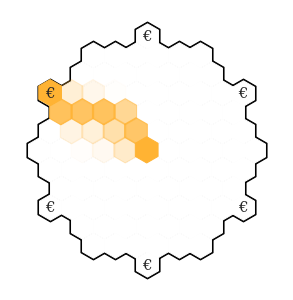

In [ ]:
sim4.save_results(path='/content')
# ANPASSEN
moves_path = '/content/sim_train_move.csv'
eval_path = '/content/sim_train_eval.csv'

output_path = '/content/drive/MyDrive/HC/VergleicheIndSim'
colors, map = sim_utils.get_sim_freq(path_movescsv=moves_path)
plots_utils.make_freq_plot(rgba_colors=colors, mapmap = map, plotname = 'sim_freqplot_601',  minority=False, output_path=output_path)

# Test Policy 3639:

In [ ]:
print('Policy:', policy_dir_list[4])

Policy: /content/drive/MyDrive/HC/SB_FINAL3/Maj/maj_step6000_oep5_mb200_3639/best_model_st13600000.zip


## Simulation

In [ ]:
sim5 = SimpleSimulation()
df_move5, df_eval5, df_check5 = sim5.one_agent_simulation(agent0=policy_dir_list[2],
                                                      num_sim=sim_nr, num_step=600,
                                                      deterministic=True)


 ------------ Start Simulation ------------
Load agent...

 ------ Start 5000 Simulations ------
0 Games over! Average Reward= 50.0
100 Games over! Average Reward= 50.0
200 Games over! Average Reward= 50.0
300 Games over! Average Reward= 50.0
400 Games over! Average Reward= 50.0
500 Games over! Average Reward= 50.0
600 Games over! Average Reward= 50.0
700 Games over! Average Reward= 50.0
800 Games over! Average Reward= 50.0
900 Games over! Average Reward= 50.0
1000 Games over! Average Reward= 50.0
1100 Games over! Average Reward= 50.0
1200 Games over! Average Reward= 50.0
1300 Games over! Average Reward= 50.0
1400 Games over! Average Reward= 50.0
1500 Games over! Average Reward= 50.0
1600 Games over! Average Reward= 50.0
1700 Games over! Average Reward= 50.0
1800 Games over! Average Reward= 50.0
1900 Games over! Average Reward= 50.0
2000 Games over! Average Reward= 50.0
2100 Games over! Average Reward= 50.0
2200 Games over! Average Reward= 50.0
2300 Games over! Average Reward= 50.0
24

## Check dataframes

### Check df

In [ ]:
sim5.check_end_position

sim  agent      0      1      2      3      4      5      6
end_position                                                               
(0, 3)        50000  50000  50000  50000  50000  50000  50000  50000  50000

In [ ]:
sim5.df_check

sim  agent       0       1  ...       4       5       6 end_position
0         0      0  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
1         0      1  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
2         0      2  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
3         0      3  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
4         0      4  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
...     ...    ...     ...     ...  ...     ...     ...     ...          ...
49995  4999      5  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
49996  4999      6  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
49997  4999      7  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
49998  4999      8  (6, 6)  (5, 5)  ...  (2, 3)  (1, 3)  (0, 3)       (0, 3)
49999  4999      9  (6, 6)  (5, 5)  ...  (2, 4)  (1, 4)  (0, 3)       (0, 3)

[50000 rows x 10 columns]

### Eval df

In [ ]:
sim5.eval_summary

sim           id      informed  ...  arrived  arrivals    moves
count  50000.000000  50000.00000  50000.000000  ...  50000.0   50000.0  50000.0
mean    2499.500000      4.50000      0.200000  ...      0.0       0.0      6.0
std     1443.390078      2.87231      0.400004  ...      0.0       0.0      0.0
min        0.000000      0.00000      0.000000  ...      0.0       0.0      6.0
25%     1249.750000      2.00000      0.000000  ...      0.0       0.0      6.0
50%     2499.500000      4.50000      0.000000  ...      0.0       0.0      6.0
75%     3749.250000      7.00000      0.000000  ...      0.0       0.0      6.0
max     4999.000000      9.00000      1.000000  ...      0.0       0.0      6.0

[8 rows x 8 columns]

In [ ]:
sim5.df_eval

sim  id  informed  reward  remaining moves  arrived  arrivals  moves
0         0   0         0     5.0                9        0         0      6
1         0   1         0     5.0                9        0         0      6
2         0   2         0     5.0                9        0         0      6
3         0   3         0     5.0                9        0         0      6
4         0   4         0     5.0                9        0         0      6
...     ...  ..       ...     ...              ...      ...       ...    ...
49995  4999   5         0     5.0                9        0         0      6
49996  4999   6         0     5.0                9        0         0      6
49997  4999   7         0     5.0                9        0         0      6
49998  4999   8         1     5.0                9        0         0      6
49999  4999   9         1     5.0                9        0         0      6

[50000 rows x 8 columns]

### Move df

In [ ]:
sim5.df_move.describe()

sim           turn  ...             s1             s2
count  300000.00000  300000.000000  ...  300000.000000  300000.000000
mean     2499.50000      30.500000  ...       2.500000       3.550000
std      1443.37805      17.318131  ...       1.707828       0.762125
min         0.00000       1.000000  ...       0.000000       3.000000
25%      1249.75000      15.750000  ...       1.000000       3.000000
50%      2499.50000      30.500000  ...       2.500000       3.000000
75%      3749.25000      45.250000  ...       4.000000       4.000000
max      4999.00000      60.000000  ...       5.000000       5.000000

[8 rows x 6 columns]

## Plot

Saved dataframes in folder: /content


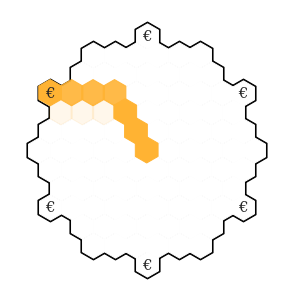

In [ ]:
sim5.save_results(path='/content')
# ANPASSEN
moves_path = '/content/sim_train_move.csv'
eval_path = '/content/sim_train_eval.csv'

output_path = '/content/drive/MyDrive/HC/VergleicheIndSim'
colors, map = sim_utils.get_sim_freq(path_movescsv=moves_path)
plots_utils.make_freq_plot(rgba_colors=colors, mapmap = map, plotname = 'sim_freqplot_3639',  minority=False, output_path=output_path)

# Test Policy 307:

In [ ]:
print('Policy:', policy_dir_list[5])

Policy: /content/drive/MyDrive/HC/SB_FINAL3/Maj/maj_step6000_oep5_mb200_307/best_model_st13600000.zip


## Simulation

In [ ]:
sim6 = SimpleSimulation()
df_move6, df_eval6, df_check6 = sim6.one_agent_simulation(agent0=policy_dir_list[5],
                                                      num_sim=sim_nr, num_step=600,
                                                      deterministic=True)


 ------------ Start Simulation ------------
Load agent...

 ------ Start 5000 Simulations ------
0 Games over! Average Reward= 60.0
100 Games over! Average Reward= 60.0
200 Games over! Average Reward= 60.0
300 Games over! Average Reward= 60.0
400 Games over! Average Reward= 60.0
500 Games over! Average Reward= 60.0
600 Games over! Average Reward= 60.0
700 Games over! Average Reward= 60.0
800 Games over! Average Reward= 60.0
900 Games over! Average Reward= 60.0
1000 Games over! Average Reward= 60.0
1100 Games over! Average Reward= 60.0
1200 Games over! Average Reward= 60.0
1300 Games over! Average Reward= 60.0
1400 Games over! Average Reward= 60.0
1500 Games over! Average Reward= 60.0
1600 Games over! Average Reward= 60.0
1700 Games over! Average Reward= 60.0
1800 Games over! Average Reward= 60.0
1900 Games over! Average Reward= 60.0
2000 Games over! Average Reward= 60.0
2100 Games over! Average Reward= 60.0
2200 Games over! Average Reward= 60.0
2300 Games over! Average Reward= 60.0
24

## Check dataframes

### Check df

In [ ]:
sim6.check_end_position

sim  agent      0      1      2      3      4      5      6
end_position                                                               
(9, 3)        50000  50000  50000  50000  50000  50000  50000  50000  50000

In [ ]:
sim6.df_check

sim  agent       0       1  ...       4       5       6 end_position
0         0      0  (6, 6)  (7, 6)  ...  (8, 4)  (8, 3)  (9, 3)       (9, 3)
1         0      1  (6, 6)  (7, 6)  ...  (8, 4)  (8, 3)  (9, 3)       (9, 3)
2         0      2  (6, 6)  (7, 6)  ...  (8, 4)  (8, 3)  (9, 3)       (9, 3)
3         0      3  (6, 6)  (7, 6)  ...  (8, 4)  (8, 3)  (9, 3)       (9, 3)
4         0      4  (6, 6)  (7, 6)  ...  (8, 4)  (8, 3)  (9, 3)       (9, 3)
...     ...    ...     ...     ...  ...     ...     ...     ...          ...
49995  4999      5  (6, 6)  (7, 6)  ...  (8, 4)  (8, 3)  (9, 3)       (9, 3)
49996  4999      6  (6, 6)  (7, 6)  ...  (8, 4)  (8, 3)  (9, 3)       (9, 3)
49997  4999      7  (6, 6)  (7, 6)  ...  (8, 4)  (8, 3)  (9, 3)       (9, 3)
49998  4999      8  (6, 6)  (7, 6)  ...  (8, 4)  (8, 3)  (9, 3)       (9, 3)
49999  4999      9  (6, 6)  (7, 6)  ...  (8, 4)  (8, 3)  (9, 3)       (9, 3)

[50000 rows x 10 columns]

### Eval df

In [ ]:
sim6.eval_summary

sim           id      informed  ...  arrived  arrivals    moves
count  50000.000000  50000.00000  50000.000000  ...  50000.0   50000.0  50000.0
mean    2499.500000      4.50000      0.200000  ...      1.0      10.0      6.0
std     1443.390078      2.87231      0.400004  ...      0.0       0.0      0.0
min        0.000000      0.00000      0.000000  ...      1.0      10.0      6.0
25%     1249.750000      2.00000      0.000000  ...      1.0      10.0      6.0
50%     2499.500000      4.50000      0.000000  ...      1.0      10.0      6.0
75%     3749.250000      7.00000      0.000000  ...      1.0      10.0      6.0
max     4999.000000      9.00000      1.000000  ...      1.0      10.0      6.0

[8 rows x 8 columns]

In [ ]:
sim6.df_eval

sim  id  informed  reward  remaining moves  arrived  arrivals  moves
0         0   0         0     5.0                9        1        10      6
1         0   1         0     5.0                9        1        10      6
2         0   2         0     5.0                9        1        10      6
3         0   3         0     5.0                9        1        10      6
4         0   4         0     5.0                9        1        10      6
...     ...  ..       ...     ...              ...      ...       ...    ...
49995  4999   5         0     5.0                9        1        10      6
49996  4999   6         0     5.0                9        1        10      6
49997  4999   7         0     5.0                9        1        10      6
49998  4999   8         1    10.0                9        1        10      6
49999  4999   9         1    10.0                9        1        10      6

[50000 rows x 8 columns]

### Move df

In [ ]:
sim6.df_move.describe()

sim           turn  ...             s1             s2
count  300000.00000  300000.000000  ...  300000.000000  300000.000000
mean     2499.50000      30.500000  ...       7.833333       4.333333
std      1443.37805      17.318131  ...       0.687185       1.105543
min         0.00000       1.000000  ...       7.000000       3.000000
25%      1249.75000      15.750000  ...       7.000000       3.000000
50%      2499.50000      30.500000  ...       8.000000       4.500000
75%      3749.25000      45.250000  ...       8.000000       5.000000
max      4999.00000      60.000000  ...       9.000000       6.000000

[8 rows x 6 columns]

## Plot

Saved dataframes in folder: /content


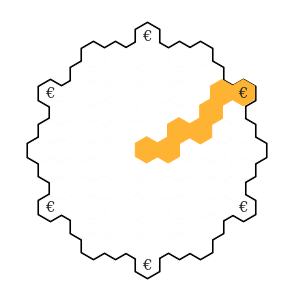

In [ ]:
sim6.save_results(path='/content')
# ANPASSEN
moves_path = '/content/sim_train_move.csv'
eval_path = '/content/sim_train_eval.csv'

output_path = '/content/drive/MyDrive/HC/VergleicheIndSim'
colors, map = sim_utils.get_sim_freq(path_movescsv=moves_path)
plots_utils.make_freq_plot(rgba_colors=colors, mapmap = map, plotname = 'sim_freqplot_307',  minority=False, output_path=output_path)

# Test Policy 4444:

In [ ]:
print('Policy:', policy_dir_list[6])

Policy: /content/drive/MyDrive/HC/SB_FINAL3/Maj/maj_step6000_oep5_mb200_4444/best_model_st13600000.zip


## Simulation

In [ ]:
sim7 = SimpleSimulation()
df_move7, df_eval7, df_check7 = sim7.one_agent_simulation(agent0=policy_dir_list[6],
                                                      num_sim=sim_nr, num_step=600,
                                                      deterministic=True)


 ------------ Start Simulation ------------
Load agent...

 ------ Start 5000 Simulations ------
0 Games over! Average Reward= 50.0
100 Games over! Average Reward= 50.0
200 Games over! Average Reward= 50.0
300 Games over! Average Reward= 50.0
400 Games over! Average Reward= 50.0
500 Games over! Average Reward= 50.0
600 Games over! Average Reward= 50.0
700 Games over! Average Reward= 50.0
800 Games over! Average Reward= 50.0
900 Games over! Average Reward= 50.0
1000 Games over! Average Reward= 50.0
1100 Games over! Average Reward= 50.0
1200 Games over! Average Reward= 50.0
1300 Games over! Average Reward= 50.0
1400 Games over! Average Reward= 50.0
1500 Games over! Average Reward= 50.0
1600 Games over! Average Reward= 50.0
1700 Games over! Average Reward= 50.0
1800 Games over! Average Reward= 50.0
1900 Games over! Average Reward= 50.0
2000 Games over! Average Reward= 50.0
2100 Games over! Average Reward= 50.0
2200 Games over! Average Reward= 50.0
2300 Games over! Average Reward= 50.0
24

## Check dataframes

### Check df

In [ ]:
sim7.check_end_position

sim  agent      0      1  ...      9     10     11     12
end_position                              ...                            
(3, 0)        50000  50000  50000  50000  ...  50000  50000  50000  50000

[1 rows x 15 columns]

In [ ]:
sim7.df_check

sim  agent       0       1  ...      10      11      12 end_position
0         0      0  (6, 6)  (5, 5)  ...  (3, 1)  (4, 1)  (3, 0)       (3, 0)
1         0      1  (6, 6)  (5, 5)  ...  (3, 1)  (4, 1)  (3, 0)       (3, 0)
2         0      2  (6, 6)  (5, 5)  ...  (3, 1)  (4, 1)  (3, 0)       (3, 0)
3         0      3  (6, 6)  (5, 5)  ...  (3, 1)  (4, 1)  (3, 0)       (3, 0)
4         0      4  (6, 6)  (5, 5)  ...  (3, 1)  (4, 1)  (3, 0)       (3, 0)
...     ...    ...     ...     ...  ...     ...     ...     ...          ...
49995  4999      5  (6, 6)  (5, 5)  ...  (3, 1)  (4, 1)  (3, 0)       (3, 0)
49996  4999      6  (6, 6)  (5, 5)  ...  (3, 1)  (4, 1)  (3, 0)       (3, 0)
49997  4999      7  (6, 6)  (5, 5)  ...  (3, 1)  (4, 1)  (3, 0)       (3, 0)
49998  4999      8  (6, 6)  (5, 5)  ...  (3, 1)  (4, 1)  (3, 0)       (3, 0)
49999  4999      9  (6, 6)  (5, 5)  ...  (4, 1)  (3, 1)  (3, 0)       (3, 0)

[50000 rows x 16 columns]

### Eval df

In [ ]:
sim7.eval_summary

sim           id      informed  ...  arrived  arrivals    moves
count  50000.000000  50000.00000  50000.000000  ...  50000.0   50000.0  50000.0
mean    2499.500000      4.50000      0.200000  ...      0.0       0.0     12.0
std     1443.390078      2.87231      0.400004  ...      0.0       0.0      0.0
min        0.000000      0.00000      0.000000  ...      0.0       0.0     12.0
25%     1249.750000      2.00000      0.000000  ...      0.0       0.0     12.0
50%     2499.500000      4.50000      0.000000  ...      0.0       0.0     12.0
75%     3749.250000      7.00000      0.000000  ...      0.0       0.0     12.0
max     4999.000000      9.00000      1.000000  ...      0.0       0.0     12.0

[8 rows x 8 columns]

In [ ]:
sim7.df_eval

sim  id  informed  reward  remaining moves  arrived  arrivals  moves
0         0   0         0     5.0                3        0         0     12
1         0   1         0     5.0                3        0         0     12
2         0   2         0     5.0                3        0         0     12
3         0   3         0     5.0                3        0         0     12
4         0   4         0     5.0                3        0         0     12
...     ...  ..       ...     ...              ...      ...       ...    ...
49995  4999   5         0     5.0                3        0         0     12
49996  4999   6         0     5.0                3        0         0     12
49997  4999   7         0     5.0                3        0         0     12
49998  4999   8         1     5.0                3        0         0     12
49999  4999   9         1     5.0                3        0         0     12

[50000 rows x 8 columns]

### Move df

In [ ]:
sim7.df_move.describe()

sim           turn  ...            s1             s2
count  600000.000000  600000.000000  ...  600000.00000  600000.000000
mean     2499.500000      60.500000  ...       3.32500       1.758333
std      1443.376847      34.639842  ...       0.84816       1.420071
min         0.000000       1.000000  ...       2.00000       0.000000
25%      1249.750000      30.750000  ...       3.00000       1.000000
50%      2499.500000      60.500000  ...       3.00000       1.000000
75%      3749.250000      90.250000  ...       4.00000       2.250000
max      4999.000000     120.000000  ...       5.00000       5.000000

[8 rows x 6 columns]

## Plot

Saved dataframes in folder: /content


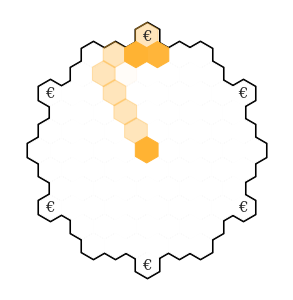

In [ ]:
sim7.save_results(path='/content')
# ANPASSEN
moves_path = '/content/sim_train_move.csv'
eval_path = '/content/sim_train_eval.csv'

output_path = '/content/drive/MyDrive/HC/VergleicheIndSim'
colors, map = sim_utils.get_sim_freq(path_movescsv=moves_path)
plots_utils.make_freq_plot(rgba_colors=colors, mapmap = map, plotname = 'sim_freqplot_4444',  minority=False, output_path=output_path)

Saved dataframes in folder: /content


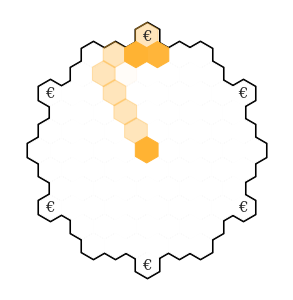

In [ ]:
sim7.save_results(path='/content')
# ANPASSEN
moves_path = '/content/sim_train_move.csv'
eval_path = '/content/sim_train_eval.csv'

output_path = '/content/drive/MyDrive/HC/VergleicheIndSim'
colors, map = sim_utils.get_sim_freq(path_movescsv=moves_path)
plots_utils.make_freq_plot(rgba_colors=colors, mapmap = map, plotname = 'sim_freqplot_4444',  minority=False, output_path=output_path)

# Test Policy 12:

In [ ]:
print('Policy:', policy_dir_list[7])

Policy: /content/drive/MyDrive/HC/SB_FINAL3/Maj/maj_step6000_oep5_mb200_12/best_model_st13600000.zip


## Simulation

In [ ]:
sim8 = SimpleSimulation()
df_move8, df_eval8, df_check8 = sim8.one_agent_simulation(agent0=policy_dir_list[7],
                                                      num_sim=sim_nr, num_step=600,
                                                      deterministic=True)


 ------------ Start Simulation ------------
Load agent...

 ------ Start 5000 Simulations ------
0 Games over! Average Reward= 50.0
100 Games over! Average Reward= 50.0
200 Games over! Average Reward= 50.0
300 Games over! Average Reward= 50.0
400 Games over! Average Reward= 50.0
500 Games over! Average Reward= 50.0
600 Games over! Average Reward= 50.0
700 Games over! Average Reward= 50.0
800 Games over! Average Reward= 50.0
900 Games over! Average Reward= 50.0
1000 Games over! Average Reward= 50.0
1100 Games over! Average Reward= 50.0
1200 Games over! Average Reward= 50.0
1300 Games over! Average Reward= 50.0
1400 Games over! Average Reward= 50.0
1500 Games over! Average Reward= 50.0
1600 Games over! Average Reward= 50.0
1700 Games over! Average Reward= 50.0
1800 Games over! Average Reward= 50.0
1900 Games over! Average Reward= 50.0
2000 Games over! Average Reward= 50.0
2100 Games over! Average Reward= 50.0
2200 Games over! Average Reward= 50.0
2300 Games over! Average Reward= 50.0
24

## Check dataframes

### Check df

In [ ]:
sim8.check_end_position

sim  agent      0      1      2      3      4      5      6
end_position                                                               
(0, 3)        50000  50000  50000  50000  50000  50000  50000  50000  50000

In [ ]:
sim8.df_check

sim  agent       0       1  ...       4       5       6 end_position
0         0      0  (6, 6)  (5, 5)  ...  (2, 4)  (1, 4)  (0, 3)       (0, 3)
1         0      1  (6, 6)  (5, 5)  ...  (2, 4)  (1, 4)  (0, 3)       (0, 3)
2         0      2  (6, 6)  (5, 5)  ...  (2, 4)  (1, 4)  (0, 3)       (0, 3)
3         0      3  (6, 6)  (5, 5)  ...  (2, 4)  (1, 4)  (0, 3)       (0, 3)
4         0      4  (6, 6)  (5, 5)  ...  (2, 4)  (1, 4)  (0, 3)       (0, 3)
...     ...    ...     ...     ...  ...     ...     ...     ...          ...
49995  4999      5  (6, 6)  (5, 5)  ...  (2, 4)  (1, 4)  (0, 3)       (0, 3)
49996  4999      6  (6, 6)  (5, 5)  ...  (2, 4)  (1, 4)  (0, 3)       (0, 3)
49997  4999      7  (6, 6)  (5, 5)  ...  (2, 4)  (1, 4)  (0, 3)       (0, 3)
49998  4999      8  (6, 6)  (5, 5)  ...  (2, 4)  (1, 4)  (0, 3)       (0, 3)
49999  4999      9  (6, 6)  (5, 5)  ...  (2, 4)  (1, 3)  (0, 3)       (0, 3)

[50000 rows x 10 columns]

### Eval df

In [ ]:
sim8.eval_summary

sim           id      informed  ...  arrived  arrivals    moves
count  50000.000000  50000.00000  50000.000000  ...  50000.0   50000.0  50000.0
mean    2499.500000      4.50000      0.200000  ...      0.0       0.0      6.0
std     1443.390078      2.87231      0.400004  ...      0.0       0.0      0.0
min        0.000000      0.00000      0.000000  ...      0.0       0.0      6.0
25%     1249.750000      2.00000      0.000000  ...      0.0       0.0      6.0
50%     2499.500000      4.50000      0.000000  ...      0.0       0.0      6.0
75%     3749.250000      7.00000      0.000000  ...      0.0       0.0      6.0
max     4999.000000      9.00000      1.000000  ...      0.0       0.0      6.0

[8 rows x 8 columns]

In [ ]:
sim8.df_eval

sim  id  informed  reward  remaining moves  arrived  arrivals  moves
0         0   0         0     5.0                9        0         0      6
1         0   1         0     5.0                9        0         0      6
2         0   2         0     5.0                9        0         0      6
3         0   3         0     5.0                9        0         0      6
4         0   4         0     5.0                9        0         0      6
...     ...  ..       ...     ...              ...      ...       ...    ...
49995  4999   5         0     5.0                9        0         0      6
49996  4999   6         0     5.0                9        0         0      6
49997  4999   7         0     5.0                9        0         0      6
49998  4999   8         1     5.0                9        0         0      6
49999  4999   9         1     5.0                9        0         0      6

[50000 rows x 8 columns]

### Move df

In [ ]:
sim8.df_move.describe()

sim           turn  ...             s1             s2
count  300000.00000  300000.000000  ...  300000.000000  300000.000000
mean     2499.50000      30.500000  ...       2.500000       3.983333
std      1443.37805      17.318131  ...       1.707828       0.591374
min         0.00000       1.000000  ...       0.000000       3.000000
25%      1249.75000      15.750000  ...       1.000000       4.000000
50%      2499.50000      30.500000  ...       2.500000       4.000000
75%      3749.25000      45.250000  ...       4.000000       4.000000
max      4999.00000      60.000000  ...       5.000000       5.000000

[8 rows x 6 columns]

## Plot

Saved dataframes in folder: /content


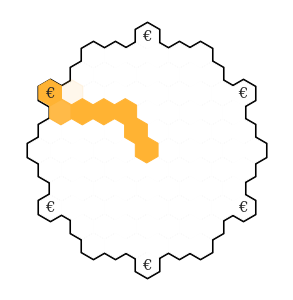

In [ ]:
sim8.save_results(path='/content')
# ANPASSEN
moves_path = '/content/sim_train_move.csv'
eval_path = '/content/sim_train_eval.csv'

output_path = '/content/drive/MyDrive/HC/VergleicheIndSim'
colors, map = sim_utils.get_sim_freq(path_movescsv=moves_path)
plots_utils.make_freq_plot(rgba_colors=colors, mapmap = map, plotname = 'sim_freqplot_12',  minority=False, output_path=output_path)

# Test Policy 23456:

In [ ]:
print('Policy:', policy_dir_list[8])

Policy: /content/drive/MyDrive/HC/SB_FINAL3/Min/min_step6000_oep5_mb200_23456/best_model_st13600000.zip


## Simulation

In [ ]:
sim9 = SimpleSimulation()
df_move9, df_eval9, df_check9 = sim9.one_agent_simulation(agent0=policy_dir_list[8],
                                                      num_sim=sim_nr, num_step=600,
                                                      deterministic=True)


 ------------ Start Simulation ------------
Load agent...

 ------ Start 5000 Simulations ------
0 Games over! Average Reward= 60.0
100 Games over! Average Reward= 60.0
200 Games over! Average Reward= 60.0
300 Games over! Average Reward= 60.0
400 Games over! Average Reward= 60.0
500 Games over! Average Reward= 60.0
600 Games over! Average Reward= 60.0
700 Games over! Average Reward= 60.0
800 Games over! Average Reward= 60.0
900 Games over! Average Reward= 60.0
1000 Games over! Average Reward= 60.0
1100 Games over! Average Reward= 60.0
1200 Games over! Average Reward= 60.0
1300 Games over! Average Reward= 60.0
1400 Games over! Average Reward= 60.0
1500 Games over! Average Reward= 60.0
1600 Games over! Average Reward= 60.0
1700 Games over! Average Reward= 60.0
1800 Games over! Average Reward= 60.0
1900 Games over! Average Reward= 60.0
2000 Games over! Average Reward= 60.0
2100 Games over! Average Reward= 60.0
2200 Games over! Average Reward= 60.0
2300 Games over! Average Reward= 60.0
24

## Check dataframes

### Check df

In [ ]:
sim9.check_end_position

In [ ]:
sim9.df_check

### Eval df

In [ ]:
sim9.eval_summary

sim           id      informed  ...  arrived  arrivals    moves
count  50000.000000  50000.00000  50000.000000  ...  50000.0   50000.0  50000.0
mean    2499.500000      4.50000      0.200000  ...      1.0      10.0     13.0
std     1443.390078      2.87231      0.400004  ...      0.0       0.0      0.0
min        0.000000      0.00000      0.000000  ...      1.0      10.0     13.0
25%     1249.750000      2.00000      0.000000  ...      1.0      10.0     13.0
50%     2499.500000      4.50000      0.000000  ...      1.0      10.0     13.0
75%     3749.250000      7.00000      0.000000  ...      1.0      10.0     13.0
max     4999.000000      9.00000      1.000000  ...      1.0      10.0     13.0

[8 rows x 8 columns]

In [ ]:
sim9.df_eval

sim  id  informed  reward  remaining moves  arrived  arrivals  moves
0         0   0         0     5.0                2        1        10     13
1         0   1         0     5.0                2        1        10     13
2         0   2         0     5.0                2        1        10     13
3         0   3         0     5.0                2        1        10     13
4         0   4         0     5.0                2        1        10     13
...     ...  ..       ...     ...              ...      ...       ...    ...
49995  4999   5         0     5.0                2        1        10     13
49996  4999   6         0     5.0                2        1        10     13
49997  4999   7         0     5.0                2        1        10     13
49998  4999   8         1    10.0                2        1        10     13
49999  4999   9         1    10.0                2        1        10     13

[50000 rows x 8 columns]

### Move df

In [ ]:
sim9.df_move.describe()

## Plot

Saved dataframes in folder: /content


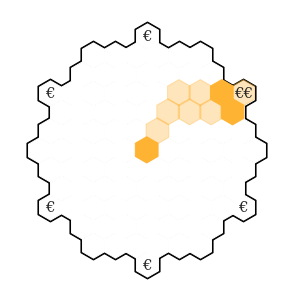

In [ ]:
sim9.save_results(path='/content')
# ANPASSEN
moves_path = '/content/sim_train_move.csv'
eval_path = '/content/sim_train_eval.csv'

output_path = '/content/drive/MyDrive/HC/VergleicheIndSim'
colors, map = sim_utils.get_sim_freq(path_movescsv=moves_path)
plots_utils.make_freq_plot(rgba_colors=colors, mapmap = map, plotname = 'sim_freqplot_23456',  minority=True, output_path=output_path)

# Test Policy 342:

In [ ]:
print('Policy:', policy_dir_list[9])

Policy: /content/drive/MyDrive/HC/SB_FINAL3/Min/min_step6000_oep5_mb200_342/best_model_st13600000.zip


## Simulation

In [ ]:
sim10 = SimpleSimulation()
df_move10, df_eval10, df_check10 = sim10.one_agent_simulation(agent0=policy_dir_list[9],
                                                      num_sim=sim_nr, num_step=600,
                                                      deterministic=True)


 ------------ Start Simulation ------------
Load agent...

 ------ Start 5000 Simulations ------
0 Games over! Average Reward= 60.0
100 Games over! Average Reward= 60.0
200 Games over! Average Reward= 60.0
300 Games over! Average Reward= 60.0
400 Games over! Average Reward= 60.0
500 Games over! Average Reward= 60.0
600 Games over! Average Reward= 60.0
700 Games over! Average Reward= 60.0
800 Games over! Average Reward= 60.0
900 Games over! Average Reward= 60.0
1000 Games over! Average Reward= 60.0
1100 Games over! Average Reward= 60.0
1200 Games over! Average Reward= 60.0
1300 Games over! Average Reward= 60.0
1400 Games over! Average Reward= 60.0
1500 Games over! Average Reward= 60.0
1600 Games over! Average Reward= 60.0
1700 Games over! Average Reward= 60.0
1800 Games over! Average Reward= 60.0
1900 Games over! Average Reward= 60.0
2000 Games over! Average Reward= 60.0
2100 Games over! Average Reward= 60.0
2200 Games over! Average Reward= 60.0
2300 Games over! Average Reward= 60.0
24

## Check dataframes

### Check df

In [ ]:
sim10.check_end_position

sim  agent      0      1      2      3      4      5      6
end_position                                                               
(9, 3)        50000  50000  50000  50000  50000  50000  50000  50000  50000

In [ ]:
sim10.df_check

sim  agent       0       1  ...       4       5       6 end_position
0         0      0  (6, 6)  (6, 5)  ...  (7, 3)  (8, 3)  (9, 3)       (9, 3)
1         0      1  (6, 6)  (6, 5)  ...  (7, 3)  (8, 3)  (9, 3)       (9, 3)
2         0      2  (6, 6)  (6, 5)  ...  (7, 3)  (8, 3)  (9, 3)       (9, 3)
3         0      3  (6, 6)  (6, 5)  ...  (7, 3)  (8, 3)  (9, 3)       (9, 3)
4         0      4  (6, 6)  (6, 5)  ...  (7, 3)  (8, 3)  (9, 3)       (9, 3)
...     ...    ...     ...     ...  ...     ...     ...     ...          ...
49995  4999      5  (6, 6)  (6, 5)  ...  (7, 3)  (8, 3)  (9, 3)       (9, 3)
49996  4999      6  (6, 6)  (6, 5)  ...  (7, 3)  (8, 3)  (9, 3)       (9, 3)
49997  4999      7  (6, 6)  (6, 5)  ...  (7, 3)  (8, 3)  (9, 3)       (9, 3)
49998  4999      8  (6, 6)  (6, 5)  ...  (7, 3)  (8, 3)  (9, 3)       (9, 3)
49999  4999      9  (6, 6)  (6, 5)  ...  (8, 4)  (8, 3)  (9, 3)       (9, 3)

[50000 rows x 10 columns]

### Eval df

In [ ]:
sim10.eval_summary

sim           id      informed  ...  arrived  arrivals    moves
count  50000.000000  50000.00000  50000.000000  ...  50000.0   50000.0  50000.0
mean    2499.500000      4.50000      0.200000  ...      1.0      10.0      6.0
std     1443.390078      2.87231      0.400004  ...      0.0       0.0      0.0
min        0.000000      0.00000      0.000000  ...      1.0      10.0      6.0
25%     1249.750000      2.00000      0.000000  ...      1.0      10.0      6.0
50%     2499.500000      4.50000      0.000000  ...      1.0      10.0      6.0
75%     3749.250000      7.00000      0.000000  ...      1.0      10.0      6.0
max     4999.000000      9.00000      1.000000  ...      1.0      10.0      6.0

[8 rows x 8 columns]

In [ ]:
sim10.df_eval

sim  id  informed  reward  remaining moves  arrived  arrivals  moves
0         0   0         0     5.0                9        1        10      6
1         0   1         0     5.0                9        1        10      6
2         0   2         0     5.0                9        1        10      6
3         0   3         0     5.0                9        1        10      6
4         0   4         0     5.0                9        1        10      6
...     ...  ..       ...     ...              ...      ...       ...    ...
49995  4999   5         0     5.0                9        1        10      6
49996  4999   6         0     5.0                9        1        10      6
49997  4999   7         0     5.0                9        1        10      6
49998  4999   8         1    10.0                9        1        10      6
49999  4999   9         1    10.0                9        1        10      6

[50000 rows x 8 columns]

### Move df

In [ ]:
sim10.df_move.describe()

sim           turn  ...             s1             s2
count  300000.00000  300000.000000  ...  300000.000000  300000.000000
mean     2499.50000      30.500000  ...       7.033333       3.533333
std      1443.37805      17.318131  ...       1.154221       0.763036
min         0.00000       1.000000  ...       6.000000       3.000000
25%      1249.75000      15.750000  ...       6.000000       3.000000
50%      2499.50000      30.500000  ...       7.000000       3.000000
75%      3749.25000      45.250000  ...       8.000000       4.000000
max      4999.00000      60.000000  ...       9.000000       5.000000

[8 rows x 6 columns]

## Plot

Saved dataframes in folder: /content


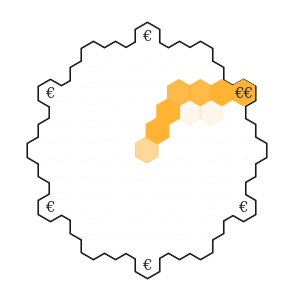

In [ ]:
sim10.save_results(path='/content')
# ANPASSEN
moves_path = '/content/sim_train_move.csv'
eval_path = '/content/sim_train_eval.csv'

output_path = '/content/drive/MyDrive/HC/VergleicheIndSim'
colors, map = sim_utils.get_sim_freq(path_movescsv=moves_path)
plots_utils.make_freq_plot(rgba_colors=colors, mapmap = map, plotname = 'sim_freqplot_342',  minority=True, output_path=output_path)